In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [4]:
profession_freq = pd.read_csv("../data/analysis_data/top1000_merged_profession_frequency.csv", index_col = 0)

In [5]:
profession_freq.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
profession_merge,,,,,,,,,,,,,,,,,,,,,
academician,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,7.054062e-07,3.495716e-07,3.271536e-07,0.000000e+00,...,1.187437e-07,2.477584e-08,2.353053e-07,7.760025e-08,3.795555e-08,9.127312e-08,1.818845e-08,1.785370e-08,1.797955e-08,0.000000e+00
accountant,0.000014,2.912382e-06,0.000008,2.953883e-06,0.000004,2.389870e-06,1.199190e-05,1.118629e-05,5.234458e-06,1.126231e-05,...,5.670011e-06,5.475462e-06,4.684715e-06,6.246820e-06,5.750266e-06,5.348605e-06,4.947257e-06,4.641961e-06,6.724351e-06,4.120042e-06
acolyte,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.543072e-07,0.000000e+00,...,2.374874e-07,2.973101e-07,4.706107e-07,2.716009e-07,2.277333e-07,2.008009e-07,7.639147e-07,3.213666e-07,3.416114e-07,6.699255e-07
acrobat,0.000005,4.853971e-07,0.000002,9.846275e-07,0.000002,6.828201e-07,1.410812e-06,6.292289e-06,3.271536e-06,6.624888e-07,...,8.015198e-07,3.716377e-07,6.417418e-07,4.656015e-07,5.124000e-07,3.650925e-07,6.184072e-07,7.320016e-07,4.854478e-07,7.704143e-07
actor,0.000030,2.329906e-05,0.000041,3.544659e-05,0.000033,1.707050e-05,2.116218e-05,3.950159e-05,2.878952e-05,1.755595e-05,...,2.977498e-05,3.017698e-05,2.708150e-05,2.692729e-05,2.856155e-05,2.893358e-05,2.731905e-05,2.754826e-05,3.315429e-05,2.003077e-05


In [6]:
years = profession_freq.columns.astype(int).values
print(years)

[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [7]:
freq = profession_freq.loc["estate agent"]
print(freq)

1950    5.544067e-07
1951    0.000000e+00
1952    5.754452e-07
1953    1.135943e-06
1954    5.394901e-07
            ...     
2013    1.603188e-06
2014    2.338264e-06
2015    1.796969e-06
2016    2.365945e-06
2017    2.046187e-06
Name: estate agent, Length: 68, dtype: float64


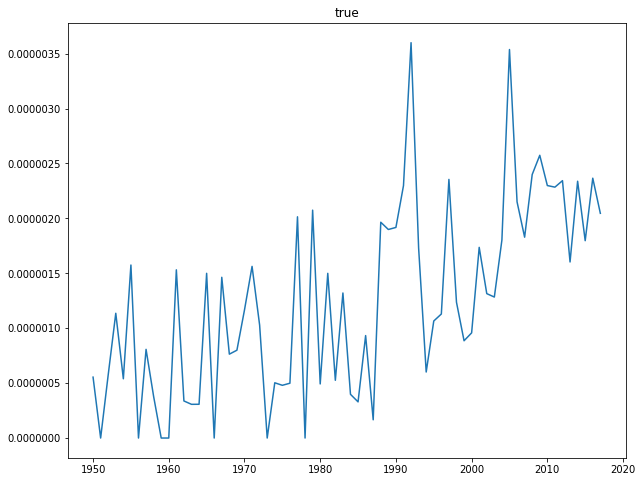

In [8]:
plt.figure(figsize = (10, 8))
plt.plot(years, freq)
plt.title("true")
plt.show()

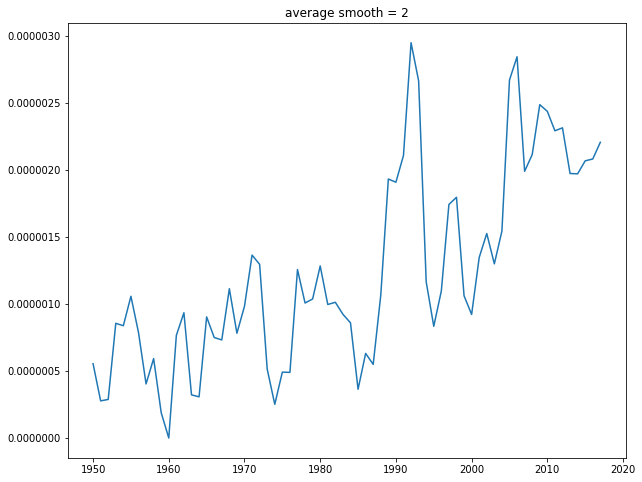

In [9]:
s = 2

plt.figure(figsize = (10, 8))
plt.plot(years, freq.rolling(s, min_periods=1).mean())
plt.title("average smooth = {}".format(s))
plt.show()

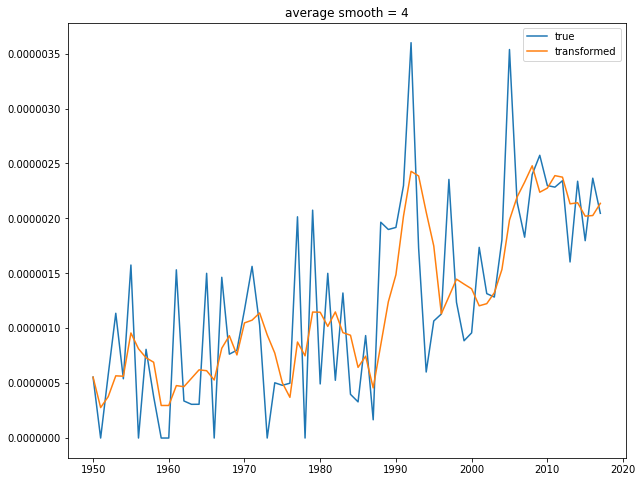

In [10]:
s = 4

plt.figure(figsize = (10, 8))
plt.plot(years, freq, label = "true")
plt.plot(years, freq.rolling(s, min_periods=1).mean(), label = "transformed")
plt.legend()
plt.title("average smooth = {}".format(s))
plt.show()

In [11]:
np.linspace(1950, 2017, 67*2 + 1)

array([1950. , 1950.5, 1951. , 1951.5, 1952. , 1952.5, 1953. , 1953.5,
       1954. , 1954.5, 1955. , 1955.5, 1956. , 1956.5, 1957. , 1957.5,
       1958. , 1958.5, 1959. , 1959.5, 1960. , 1960.5, 1961. , 1961.5,
       1962. , 1962.5, 1963. , 1963.5, 1964. , 1964.5, 1965. , 1965.5,
       1966. , 1966.5, 1967. , 1967.5, 1968. , 1968.5, 1969. , 1969.5,
       1970. , 1970.5, 1971. , 1971.5, 1972. , 1972.5, 1973. , 1973.5,
       1974. , 1974.5, 1975. , 1975.5, 1976. , 1976.5, 1977. , 1977.5,
       1978. , 1978.5, 1979. , 1979.5, 1980. , 1980.5, 1981. , 1981.5,
       1982. , 1982.5, 1983. , 1983.5, 1984. , 1984.5, 1985. , 1985.5,
       1986. , 1986.5, 1987. , 1987.5, 1988. , 1988.5, 1989. , 1989.5,
       1990. , 1990.5, 1991. , 1991.5, 1992. , 1992.5, 1993. , 1993.5,
       1994. , 1994.5, 1995. , 1995.5, 1996. , 1996.5, 1997. , 1997.5,
       1998. , 1998.5, 1999. , 1999.5, 2000. , 2000.5, 2001. , 2001.5,
       2002. , 2002.5, 2003. , 2003.5, 2004. , 2004.5, 2005. , 2005.5,
      

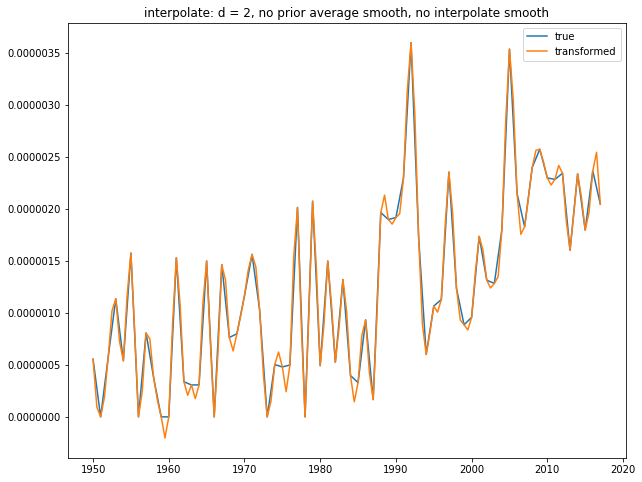

In [12]:
d = 2

tck = interpolate.splrep(years, freq)
new_years = np.linspace(1950, 2017, 67*d + 1)
new_freq = interpolate.splev(new_years, tck)

plt.figure(figsize = (10, 8))
plt.plot(years, freq, label = "true")
plt.plot(new_years, new_freq, label = "transformed")
plt.title("interpolate: d = {}, no prior average smooth, no interpolate smooth".format(d))
plt.legend()
plt.show()

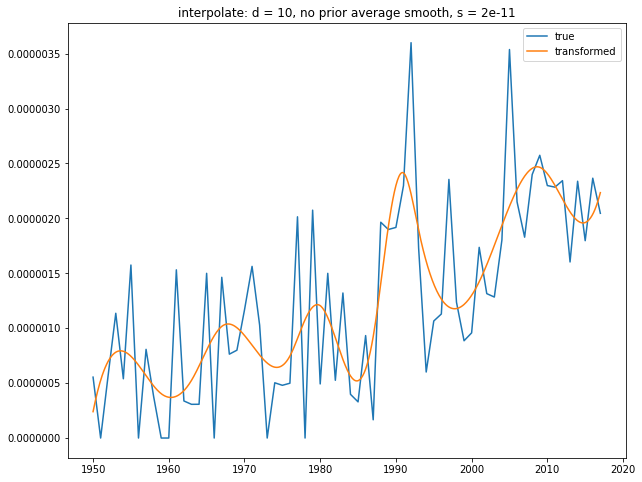

In [13]:
d = 10
s = 2e-11

tck = interpolate.splrep(years, freq, s = s, w = np.ones(len(years)))
new_years = np.linspace(1950, 2017, 67*d + 1)
new_freq = interpolate.splev(new_years, tck)

plt.figure(figsize = (10, 8))
plt.plot(years, freq, label = "true")
plt.plot(new_years, new_freq, label = "transformed")
plt.title("interpolate: d = {}, no prior average smooth, s = {}".format(d, s))
plt.legend()
plt.show()

In [14]:
imdb_df = pd.read_csv("../data/imdb/imdb.csv", index_col = None)

In [15]:
genre_set = set([genre for genre_list in imdb_df.imdb_genres.dropna().str.split(";") for genre in genre_list])
print(genre_set)

{'Fantasy', 'Western', 'Horror', 'Reality-TV', 'Romance', 'Adventure', 'Short', 'Documentary', 'Musical', 'Music', 'Drama', 'History', 'War', 'Biography', 'Sport', 'Film-Noir', 'Thriller', 'Mystery', 'Game-Show', 'News', 'Action', 'Comedy', 'Sci-Fi', 'Animation', 'Crime', 'Adult', 'Talk-Show', 'Family'}


In [16]:
genre_series = imdb_df.imdb_genres.dropna()

In [17]:
genre_df = pd.DataFrame(data = np.zeros((len(genre_series), len(genre_set))), columns = list(genre_set))

In [18]:
for i, x in enumerate(genre_series):
    for g in x.split(";"):
        genre_df.loc[i, g] = 1

In [20]:
mean_srs = genre_df.mean()

In [21]:
corr_df = genre_df.corr()

In [27]:
corr_list = []

for x, r in corr_df.iterrows():
    for y, v in r.items():
        if x != y:
            corr_list.append((x, y, v))

corr_list = sorted(corr_list, key = lambda x: x[2], reverse = True)

In [28]:
corr_list[:50]

[('Reality-TV', 'Game-Show', 0.5932229228575259),
 ('Game-Show', 'Reality-TV', 0.5932229228575259),
 ('Mystery', 'Crime', 0.47371614553264524),
 ('Crime', 'Mystery', 0.47371614553264524),
 ('Adventure', 'Sci-Fi', 0.45741272221782286),
 ('Sci-Fi', 'Adventure', 0.45741272221782286),
 ('Thriller', 'Mystery', 0.4331099088193023),
 ('Mystery', 'Thriller', 0.4331099088193023),
 ('Adventure', 'Action', 0.4105907659267547),
 ('Action', 'Adventure', 0.4105907659267547),
 ('Thriller', 'Crime', 0.3948980881912245),
 ('Crime', 'Thriller', 0.3948980881912245),
 ('Action', 'Sci-Fi', 0.3587181742629042),
 ('Sci-Fi', 'Action', 0.3587181742629042),
 ('Adventure', 'Animation', 0.33383353569600754),
 ('Animation', 'Adventure', 0.33383353569600754),
 ('Adventure', 'Family', 0.33237740604462646),
 ('Family', 'Adventure', 0.33237740604462646),
 ('Animation', 'Family', 0.31928741444891817),
 ('Family', 'Animation', 0.31928741444891817),
 ('Fantasy', 'Adventure', 0.2897147825197285),
 ('Adventure', 'Fantasy',